# PHASE 1

### Traning on APPL


In [1]:
import cnn_model
from cnn_model import CNN
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
temp = CNN()
temp.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

In [9]:
print(temp.model().summary())      

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 15, 15, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               5244

In [10]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255,
                                    validation_split=0.25)

training_dataset = image_generator.flow_from_directory(directory='Data/AAPL', 
                                                       target_size=(15,15),
                                                       batch_size = 16, 
                                                       color_mode='grayscale',                                                     
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='Data/AAPL', 
                                                         target_size=(15,15),
                                                         batch_size = 16, 
                                                         color_mode='grayscale',   
                                                         subset="validation",
                                                         class_mode='categorical')

Found 7581 images belonging to 3 classes.
Found 2526 images belonging to 3 classes.


In [11]:
from keras.callbacks import  ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.0001)

callbacks = [learning_rate_reduction]

In [12]:
history = temp.fit_generator(training_dataset, 
                             steps_per_epoch=100, 
                             epochs=40,
                             validation_data=validation_dataset, 
                             validation_steps=50)

Epoch 1/40
100/100 [==============================] - 3s 19ms/step - loss: 1.2634 - accuracy: 0.4287 - val_loss: 1.0558 - val_accuracy: 0.4462
Epoch 2/40
100/100 [==============================] - 1s 15ms/step - loss: 1.0690 - accuracy: 0.4381 - val_loss: 1.0372 - val_accuracy: 0.4600
Epoch 3/40
100/100 [==============================] - 2s 16ms/step - loss: 1.0596 - accuracy: 0.4361 - val_loss: 1.0793 - val_accuracy: 0.4588
Epoch 4/40
100/100 [==============================] - 1s 15ms/step - loss: 1.0423 - accuracy: 0.4598 - val_loss: 1.0265 - val_accuracy: 0.4538
Epoch 5/40
100/100 [==============================] - 2s 15ms/step - loss: 1.0228 - accuracy: 0.4759 - val_loss: 0.9839 - val_accuracy: 0.4975
Epoch 6/40
100/100 [==============================] - 1s 15ms/step - loss: 1.0198 - accuracy: 0.4664 - val_loss: 1.0440 - val_accuracy: 0.4775
Epoch 7/40
100/100 [==============================] - 1s 15ms/step - loss: 1.0187 - accuracy: 0.4871 - val_loss: 0.9979 - val_accuracy: 0.4750

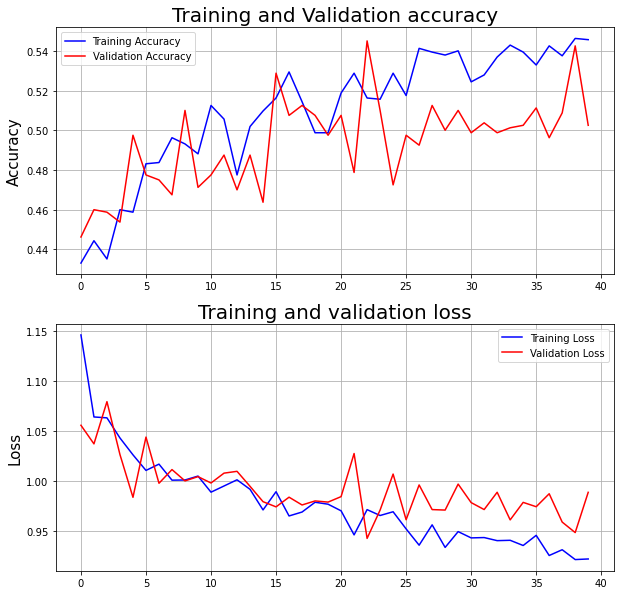

In [13]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()
ax1.grid('True')

ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()
ax2.grid('True')

plt.show()

In [14]:
temp.save('MODEL/type_1/phase_1/')

INFO:tensorflow:Assets written to: MODEL/type_1/phase_1/assets


# PHASE 2


### Traning on BHARTIARTL, RELIANCE, AMZN


In [55]:
from keras.models import load_model

temp = load_model('MODEL/type_1/phase_1/')

In [56]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255,
                                    validation_split=0.25)

training_dataset = image_generator.flow_from_directory(directory='Data/BHARTIARTL', 
                                                       target_size=(15,15),
                                                       batch_size = 16, 
                                                       color_mode='grayscale',                                                     
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='Data/BHARTIARTL', 
                                                         target_size=(15,15),
                                                         batch_size = 16, 
                                                         color_mode='grayscale',   
                                                         subset="validation",
                                                         class_mode='categorical')

Found 3452 images belonging to 3 classes.
Found 1150 images belonging to 3 classes.


In [ ]:
from keras.callbacks import  ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.0001)

callbacks = [learning_rate_reduction]

In [57]:
history = temp.fit_generator(training_dataset, 
                             steps_per_epoch=100, 
                             epochs=40,
                             validation_data=validation_dataset, 
                             validation_steps=50)

C:\Users\ashut\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
100/100 [==============================] - 24s 229ms/step - loss: 0.9457 - accuracy: 0.5328 - val_loss: 0.9242 - val_accuracy: 0.5675
Epoch 2/40
100/100 [==============================] - 12s 118ms/step - loss: 0.9384 - accuracy: 0.5560 - val_loss: 0.9146 - val_accuracy: 0.5550
Epoch 3/40
100/100 [==============================] - 6s 65ms/step - loss: 0.8917 - accuracy: 0.5724 - val_loss: 0.9067 - val_accuracy: 0.5700
Epoch 4/40
100/100 [==============================] - 4s 41ms/step - loss: 0.9046 - accuracy: 0.5612 - val_loss: 0.9452 - val_accuracy: 0.5362
Epoch 5/40
100/100 [==============================] - 3s 29ms/step - loss: 0.8938 - accuracy: 0.5597 - val_loss: 0.9368 - val_accuracy: 0.5325
Epoch 6/40
100/100 [==============================] - 3s 29ms/step - loss: 0.9178 - accuracy: 0.5595 - val_loss: 0.9435 - val_accuracy: 0.5425
Epoch 7/40
100/100 [==============================] - 3s 30ms/step - loss: 0.8842 - accuracy: 0.5748 - val_loss: 0.9146 - val_accuracy: 0.

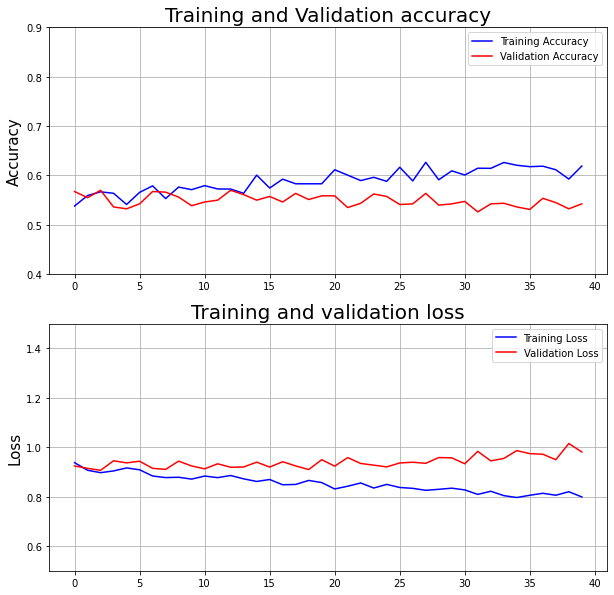

In [58]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()
ax1.set_ylim([0.4, 0.9])
ax1.grid('True')


ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()
ax2.grid('True')
ax2.set_ylim([0.5, 1.5])

plt.show()

In [59]:
temp.save('MODEL/type_1/phase_2/')

INFO:tensorflow:Assets written to: MODEL/type_1/phase_2/assets


INFO:tensorflow:Assets written to: MODEL/type_1/phase_2/assets


# PHASE 3
### Traning on NASDAQ & NIFTY500 INDICES

In [60]:
from keras.models import load_model

temp = load_model('MODEL/type_1/phase_2/')

In [64]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(rescale=1/255,
                                    validation_split=0.25)

training_dataset = image_generator.flow_from_directory(directory='Data/NIFTY500', 
                                                       target_size=(15,15),
                                                       batch_size = 16, 
                                                       color_mode='grayscale',                                                     
                                                       subset="training",
                                                       class_mode='categorical')
                                          

validation_dataset = image_generator.flow_from_directory(directory='Data/NIFTY500', 
                                                         target_size=(15,15),
                                                         batch_size = 16, 
                                                         color_mode='grayscale',   
                                                         subset="validation",
                                                         class_mode='categorical')

Found 2820 images belonging to 3 classes.
Found 938 images belonging to 3 classes.


In [ ]:
from keras.callbacks import  ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=1, 
                                            verbose=1, 
                                            factor=0.75, 
                                            min_lr=0.0001)

callbacks = [learning_rate_reduction]

In [65]:
history = temp.fit_generator(training_dataset, 
                             steps_per_epoch=100, 
                             epochs=40,
                             validation_data=validation_dataset, 
                             validation_steps=50)

Epoch 1/40
100/100 [==============================] - 24s 244ms/step - loss: 0.9152 - accuracy: 0.5456 - val_loss: 0.8974 - val_accuracy: 0.5688
Epoch 2/40
100/100 [==============================] - 8s 84ms/step - loss: 0.9075 - accuracy: 0.5485 - val_loss: 0.9123 - val_accuracy: 0.5725
Epoch 3/40
100/100 [==============================] - 4s 45ms/step - loss: 0.9195 - accuracy: 0.5353 - val_loss: 0.9237 - val_accuracy: 0.5725
Epoch 4/40
100/100 [==============================] - 3s 26ms/step - loss: 0.8823 - accuracy: 0.5725 - val_loss: 0.8979 - val_accuracy: 0.5500
Epoch 5/40
100/100 [==============================] - 2s 21ms/step - loss: 0.8974 - accuracy: 0.5422 - val_loss: 0.9107 - val_accuracy: 0.5663
Epoch 6/40
100/100 [==============================] - 2s 19ms/step - loss: 0.8755 - accuracy: 0.5598 - val_loss: 0.8892 - val_accuracy: 0.5875
Epoch 7/40
100/100 [==============================] - 2s 18ms/step - loss: 0.8830 - accuracy: 0.5586 - val_loss: 0.8721 - val_accuracy: 0.58

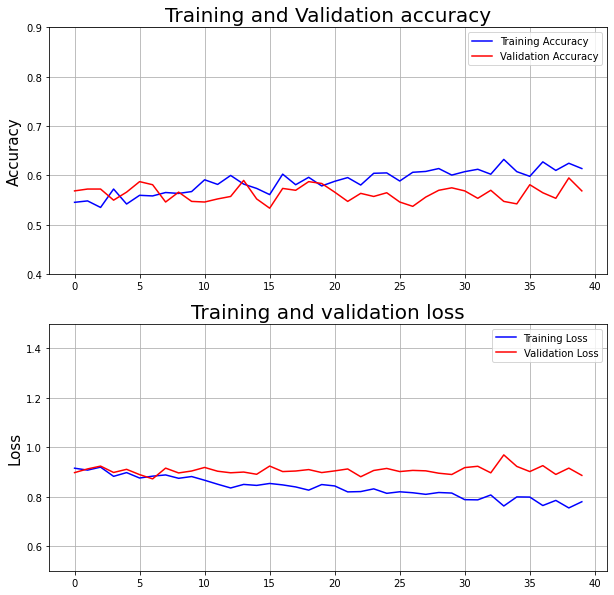

In [66]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

fig = plt.figure(figsize=(10,10),edgecolor='Black') 
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(accuracy, label='Training Accuracy', color='Blue')
ax1.plot(val_accuracy, label='Validation Accuracy', color='Red')
ax1.set_title("Training and Validation accuracy", fontsize=20)
ax1.set_ylabel("Accuracy", fontsize=15)
ax1.legend()
ax1.set_ylim([0.4, 0.9])
ax1.grid('True')


ax2.plot(loss, label='Training Loss', color='Blue')
ax2.plot(val_loss, label='Validation Loss', color='Red')
ax2.set_title("Training and validation loss", fontsize=20)
ax2.set_ylabel("Loss", fontsize=15)
ax2.legend()
ax2.grid('True')
ax2.set_ylim([0.5, 1.5])

plt.show()

In [68]:
temp.save('MODEL/type_1/phase_3/')

INFO:tensorflow:Assets written to: MODEL/type_1/phase_3/assets


INFO:tensorflow:Assets written to: MODEL/type_1/phase_3/assets


In [53]:
training_dataset.class_indices

{'Buy': 0, 'Hold': 1, 'Sell': 2}